In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.shape

(768, 9)

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
X=df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
y=df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Removing some columns from the dataset to allow our model make predictions on unseen data

In [46]:
preds_data1=df.iloc[159]
preds_data1

Pregnancies                  17.000
Glucose                     163.000
BloodPressure                72.000
SkinThickness                41.000
Insulin                     114.000
BMI                          40.900
DiabetesPedigreeFunction      0.817
Age                          47.000
Outcome                       1.000
Name: 159, dtype: float64

In [42]:
preds_data2=df.iloc[600]
preds_data2

Pregnancies                   1.0
Glucose                     108.0
BloodPressure                88.0
SkinThickness                19.0
Insulin                       0.0
BMI                          27.1
DiabetesPedigreeFunction      0.4
Age                          24.0
Outcome                       0.0
Name: 600, dtype: float64

In [49]:
df.drop([159, 600], inplace=True)
df.shape

(766, 9)

#### Fitting to the model

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [59]:
X_train.shape

(537, 8)

In [61]:
X_test.shape

(231, 8)

In [73]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
model.predict(X_test)
score=model.score(X_test, y_test)
print(f'Model accuracy on test data={score*100:.2f}%')

Model accuracy on test data=74.89%


### Model Evaluation

In [88]:
y_preds=model.predict(X_test)
print(f"Classifiication report:\n\n{classification_report(y_test, y_preds)}")

Classifiication report:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       146
           1       0.69      0.58      0.63        85

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



In [91]:
cf_matrix=confusion_matrix(y_test, y_preds)
print(f'Confusion matrix:\n\n{cf_matrix}')

Confusion matrix:

[[124  22]
 [ 36  49]]


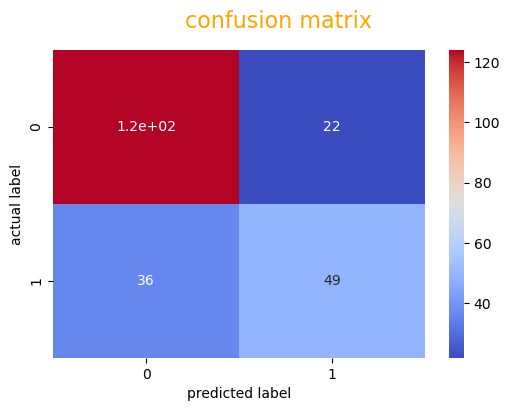

In [100]:
#visualizing confusion matrix
fig, ax=plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
fig.suptitle(t='confusion matrix',
            color='orange',
            fontsize=16)
ax.set(xlabel="predicted label",
      ylabel="actual label");

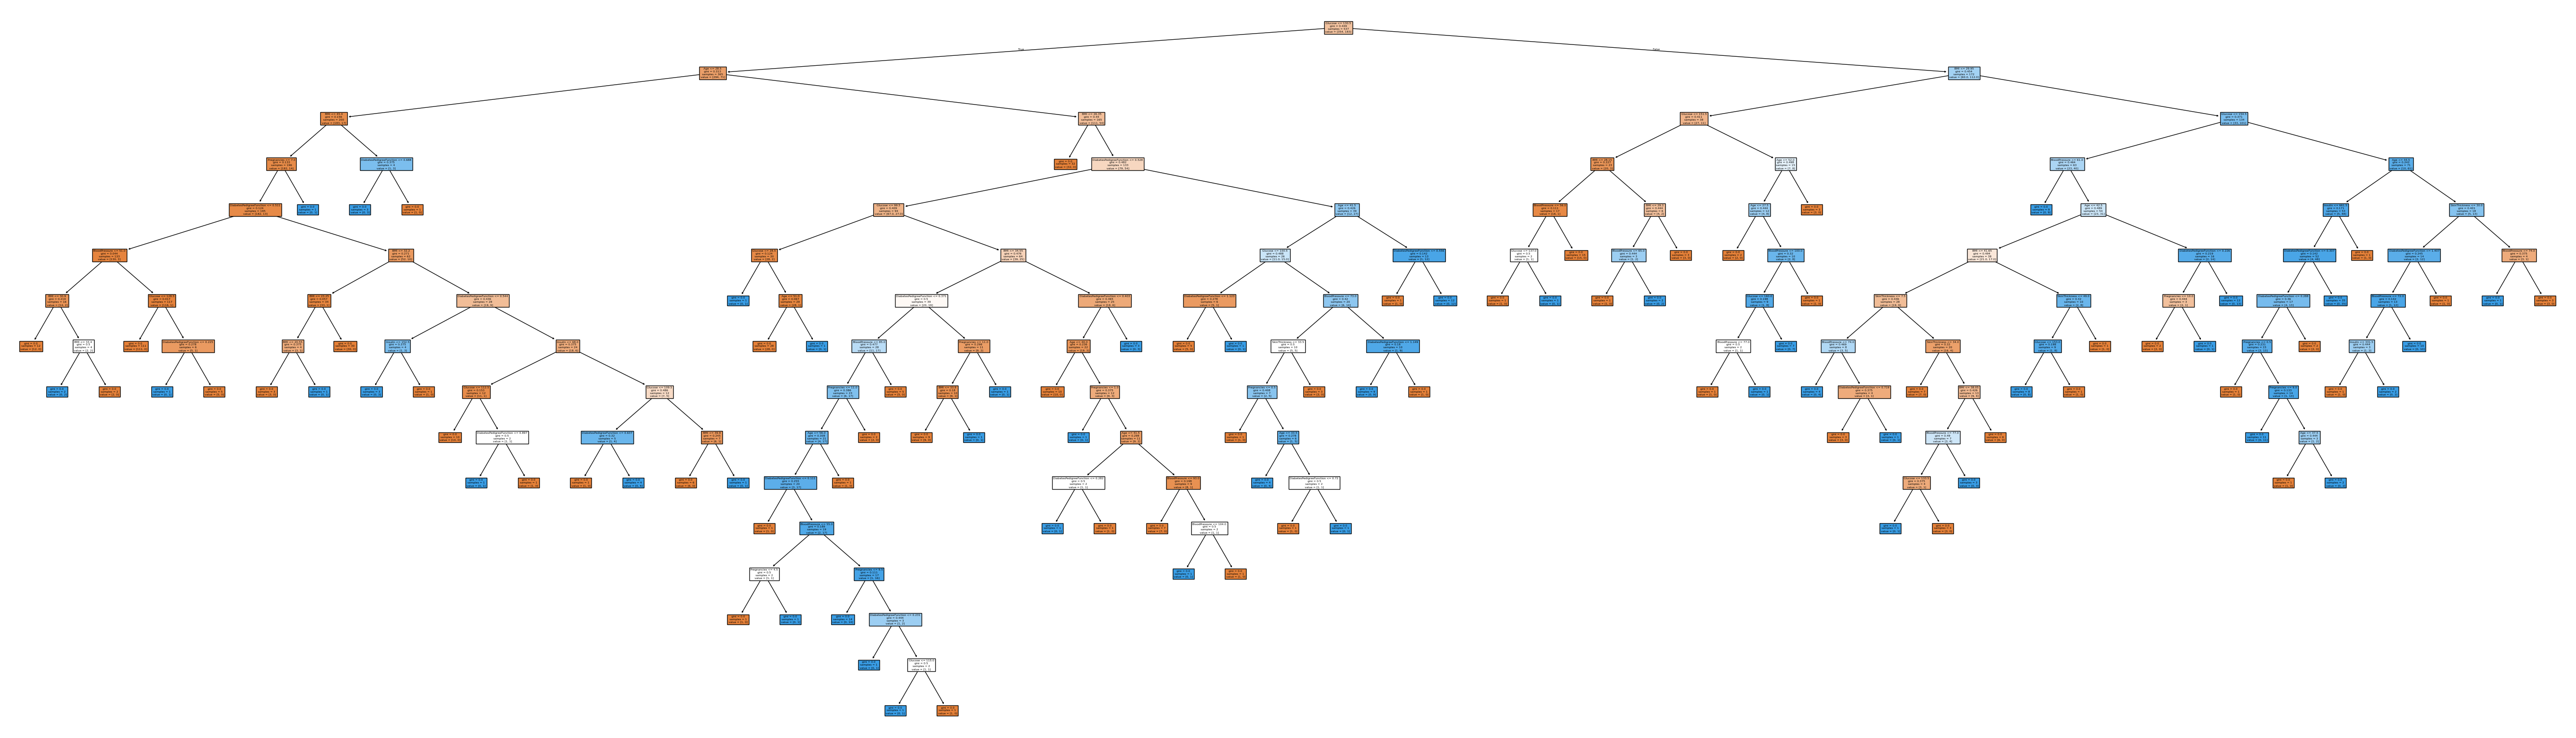

In [111]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]);

#### Making predictions with unseen data

In [116]:
preds_data1

Pregnancies                  17.000
Glucose                     163.000
BloodPressure                72.000
SkinThickness                41.000
Insulin                     114.000
BMI                          40.900
DiabetesPedigreeFunction      0.817
Age                          47.000
Outcome                       1.000
Name: 159, dtype: float64

In [121]:
pred_x1=pd.DataFrame(np.array([17.000, 163.000, 72.000, 41.000, 114.000, 40.900, 0.819, 47.000]).reshape(1,-1),
                    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ])
pred_y1=model.predict(pred_x1)

if pred_y1 == 1:
    print('Having diabetes')
else:
    print('not having diabetes')

Having diabetes


In [123]:
preds_data2

Pregnancies                   1.0
Glucose                     108.0
BloodPressure                88.0
SkinThickness                19.0
Insulin                       0.0
BMI                          27.1
DiabetesPedigreeFunction      0.4
Age                          24.0
Outcome                       0.0
Name: 600, dtype: float64

In [125]:
pred_x2=pd.DataFrame(np.array([1.0, 108.0, 88.0, 19.0, 0.0, 27.1, 0.4, 24.0]).reshape(1,-1),
                    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ])
pred_y2=model.predict(pred_x2)

if pred_y1 == 1:
    print('Having diabetes')
else:
    print('not having diabetes')

Having diabetes


## Saving the model and loading it

In [131]:
import pickle
pickle.dump(model, open('decision_tree_model.pkl', 'wb'))

In [133]:
loaded_model=pickle.load(open('decision_tree_model.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7489177489177489